In [2]:
import networkx as nx
import numpy as np
import seaborn as sns
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
from itertools import product
import random
from itertools import combinations

## P 5.2

In [22]:
N = 100
steps = 1000

In [23]:
def clustering_coefficient(G):
    total_coefficient = 0
    
    for node in G.nodes():
        neighbors = list(G.neighbors(node))
        k = len(neighbors)
        
        if k < 2:
            continue
            
        edges_between_neighbors = 0
        for i in range(k):
            for j in range(i + 1, k):
                if G.has_edge(neighbors[i], neighbors[j]):
                    edges_between_neighbors += 1
        
        possible_edges = k * (k - 1) / 2
        node_coefficient = edges_between_neighbors / possible_edges
        total_coefficient += node_coefficient
    
    return total_coefficient / G.number_of_nodes()

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:25<00:00, 39.32it/s]


<Axes: xlabel='p', ylabel='clustering'>

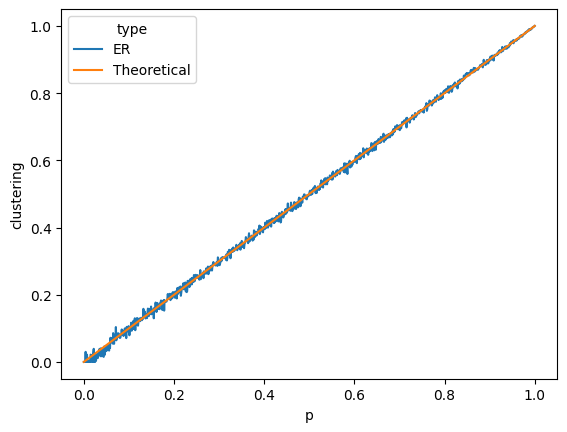

In [26]:
import seaborn as sns
import pandas as pd

data = []
for p in tqdm(np.linspace(0, 1, steps)):
    G = nx.erdos_renyi_graph(N, p, directed=False)
    data.append({'p': p, 'clustering': clustering_coefficient(G), 'type': 'ER'})
    data.append({'p': p, 'clustering': p, 'type': 'Theoretical'})

df = pd.DataFrame(data)
sns.lineplot(data=df, x='p', y='clustering', hue='type')

# P 5.3

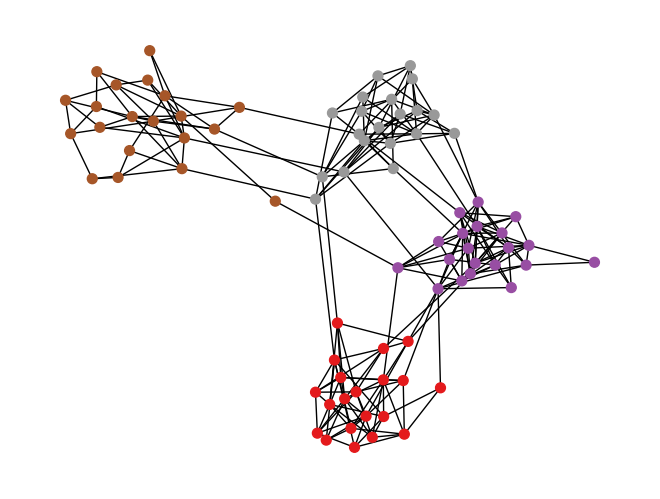

In [6]:
N, communities = 20, 4
p_within, p_between = 0.3, 0.01

def get_sbm_graph(n, communities, p_in, p_out):
    G = nx.Graph()
    G.add_nodes_from(range(n * communities))

    for u, v in combinations(G.nodes(), 2):
        prob = p_in if (u // n) == (v // n) else p_out

        if random.random() < prob:
            G.add_edge(u, v)
    return G

G = get_sbm_graph(N, communities, p_within, p_between)

colors = [i//N for i in range(communities*N)]
nx.draw(G, node_color=colors, cmap=plt.cm.Set1, node_size=50)
plt.show()

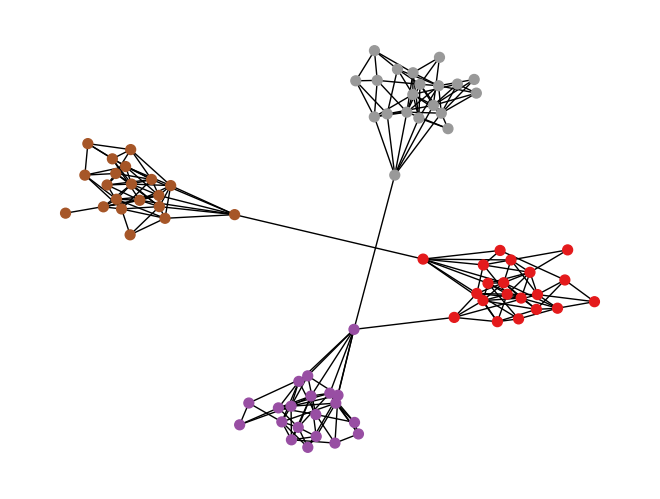

In [9]:
G = get_sbm_graph(N, communities, 0.3, 0.001)

colors = [i//N for i in range(communities*N)]
nx.draw(G, node_color=colors, cmap=plt.cm.Set1, node_size=50)
plt.show()

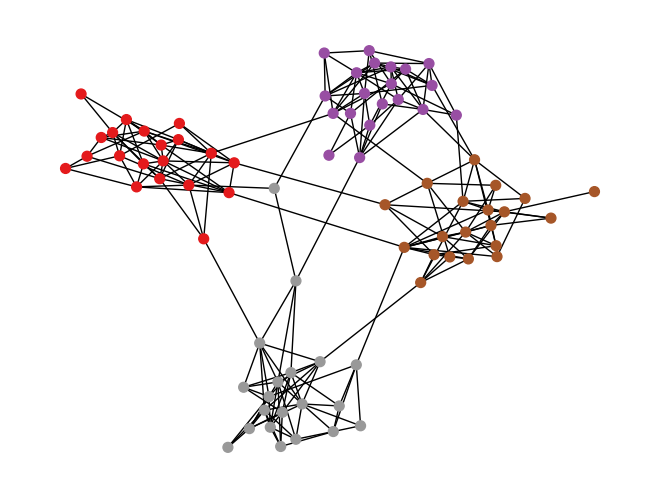

In [13]:
G = get_sbm_graph(N, communities, 0.3, 0.005)

colors = [i//N for i in range(communities*N)]
nx.draw(G, node_color=colors, cmap=plt.cm.Set1, node_size=50)
plt.show()

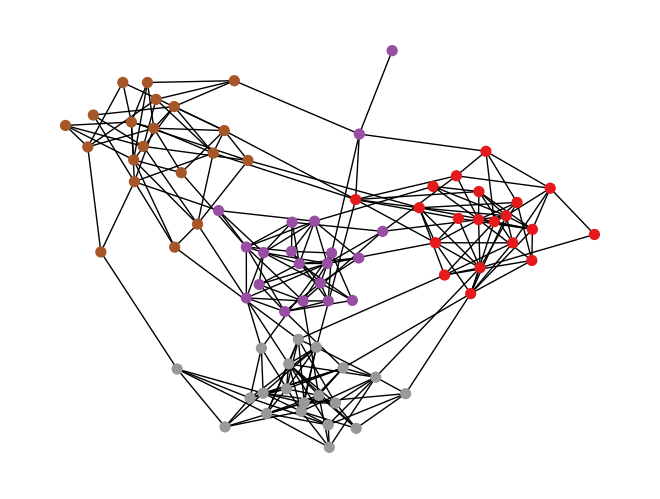

In [15]:
G = get_sbm_graph(N, communities, 0.3, 0.01)

colors = [i//N for i in range(communities*N)]
nx.draw(G, node_color=colors, cmap=plt.cm.Set1, node_size=50)
plt.show()

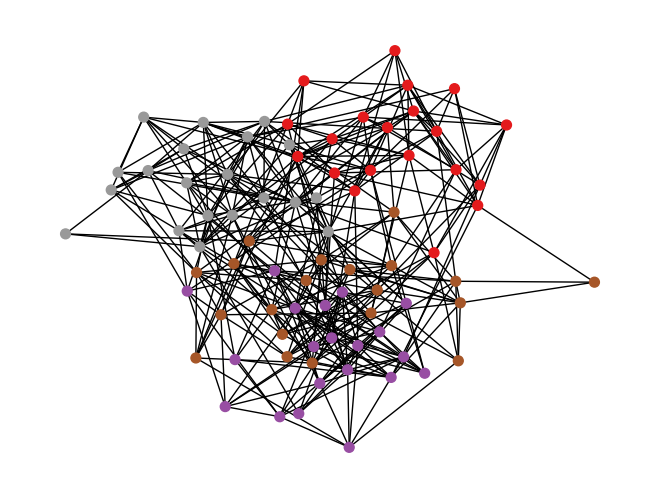

In [18]:
G = get_sbm_graph(N, communities, 0.3, 0.05)

colors = [i//N for i in range(communities*N)]
nx.draw(G, node_color=colors, cmap=plt.cm.Set1, node_size=50)
plt.show()

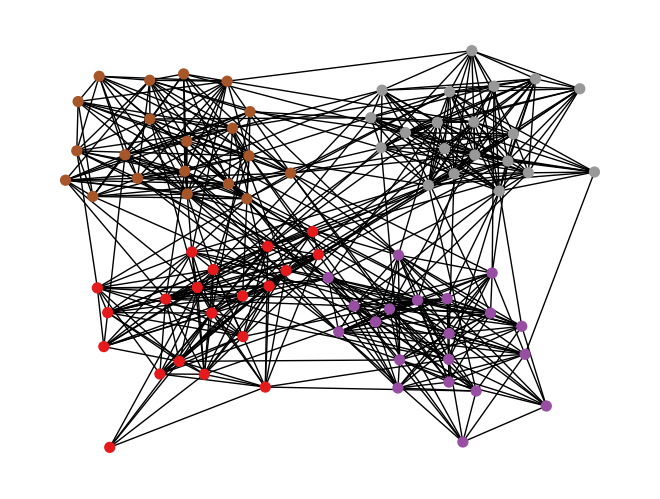

In [19]:
G = get_sbm_graph(N, communities, 0.6, 0.05)

colors = [i//N for i in range(communities*N)]
nx.draw(G, node_color=colors, cmap=plt.cm.Set1, node_size=50)
plt.show()

# P5.4

In [22]:
def watts_strogatz(n, k, p):
    G = nx.Graph()
    G.add_nodes_from(range(n))
    for u in range(n):
        for j in range(1, k // 2 + 1):
            if random.random() < p:
                # Rewire: connect u to a random node w (excluding self and existing neighbors)
                candidates = [w for w in range(n) if w != u and not G.has_edge(u, w)]
                if candidates: G.add_edge(u, random.choice(candidates))
            else:
                # Keep ring structure: connect u to its j-th neighbor
                G.add_edge(u, (u + j) % n)
    return G

def clustering_coefficient(G):
    total_coefficient = 0

    for node in G.nodes():
        neighbors = list(G.neighbors(node))
        k = len(neighbors)

        if k < 2:
            continue

        edges_between_neighbors = 0
        for i in range(k):
            for j in range(i + 1, k):
                if G.has_edge(neighbors[i], neighbors[j]):
                    edges_between_neighbors += 1

        possible_edges = k * (k - 1) / 2
        node_coefficient = edges_between_neighbors / possible_edges
        total_coefficient += node_coefficient

    return total_coefficient / G.number_of_nodes()

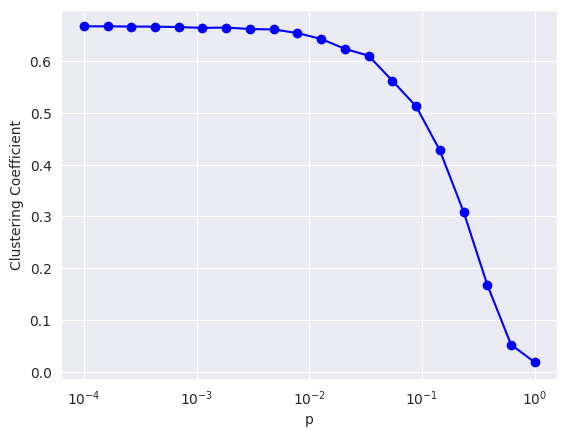

In [24]:
p_vals = np.logspace(-4, 0, 20)
y_vals = [np.mean([clustering_coefficient(watts_strogatz(500, 10, p)) for _ in range(5)]) for p in p_vals]

plt.semilogx(p_vals, y_vals, 'bo-')
plt.xlabel('p'); plt.ylabel('Clustering Coefficient')
plt.show()